In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots

plt.style.use(['science', 'no-latex', 'ieee'])
matplotlib.rcParams.update({'font.size': 9})
plt.rcParams['font.serif'] = 'Times New Roman'
dpi=150

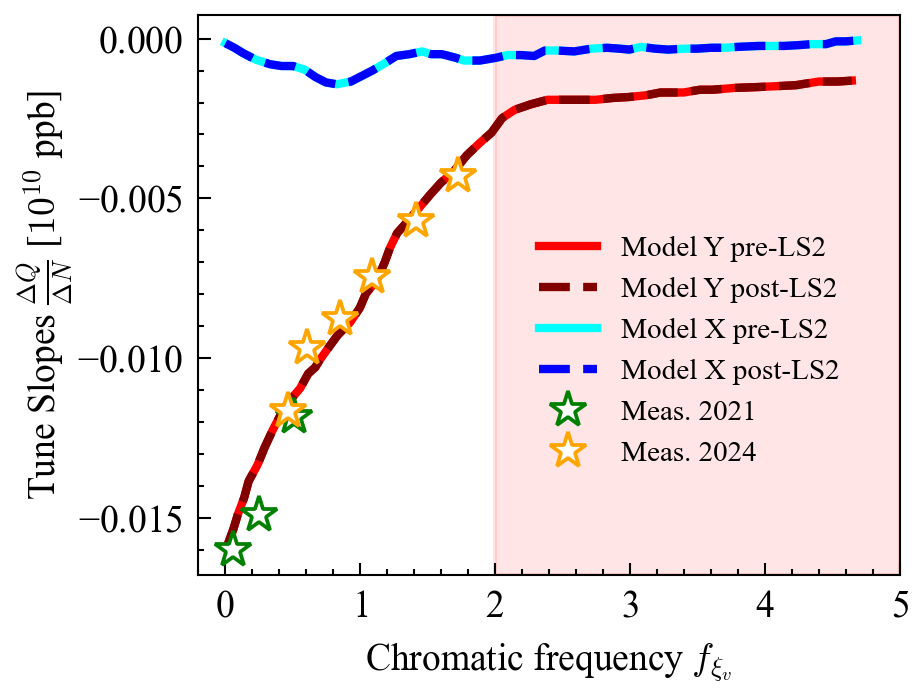

In [2]:
figsize = (3.25, 2.5)
fig, ax = plt.subplots(figsize=figsize, dpi=300, tight_layout=True)
ax.set_prop_cycle("color", plt.cm.rainbow_r(np.linspace(0,1,5)))

ax.set_xlabel(r"Chromatic frequency $f_{\xi_v}$")
ax.set_ylabel(r'Tune Slopes $\frac{\Delta Q}{\Delta N}$ [$10^{10}$ ppb]', labelpad=0.5)
ax.set_xlim(-0.2, 5)
#ax.set_ylim(0, 10.)
#ax.minorticks_off()
ax.tick_params(axis='both', top=False, right=False)
ax.tick_params(axis='both', which='minor', top=False, right=False)


d = np.loadtxt("SPS-Tune-Shifts/meas/measY-2021.csv", skiprows=1, delimiter=',')
x0, y_2021 = d[:,0], d[:,1]

d = np.loadtxt("SPS-Tune-Shifts/meas/measY-2024.csv", skiprows=1, delimiter=',')
x1, y_2024 = d[:,0], d[:,1]

d = np.loadtxt("SPS-Tune-Shifts/meas/modelX.csv", skiprows=1, delimiter=',')
x2, y_modelX = d[:,0], d[:,1]

d = np.loadtxt("SPS-Tune-Shifts/meas/modelY.csv", skiprows=1, delimiter=',')
x3, y_modelY = d[:,0], d[:,1]


l1 = ax.plot(x3, y_modelY, lw=2, ls='-', c='r')
l2 = ax.plot(x3, y_modelY, lw=2, ls='--', c='maroon')

l3 = ax.plot(x2, y_modelX, lw=2, ls='-', c='cyan')
l4 = ax.plot(x2, y_modelX, lw=2, ls='--', c='b')

m1 = ax.errorbar(x0, y_2021, fmt = '*',mfc='w', mec='g',  ms=9, elinewidth=0.6, markeredgewidth=0.9, capsize=2)
m2 = ax.errorbar(x1, y_2024, fmt = '*',mfc='w', mec='orange',  ms=9, elinewidth=0.6, markeredgewidth=0.9, capsize=2)

ax.axvspan(2, 5, color='red', alpha=0.1)

ax.legend(handles=[l1[0], l2[0], l3[0], l4[0], m1, m2], 
           labels=['Model Y pre-LS2', 'Model Y post-LS2', 'Model X pre-LS2', 'Model X post-LS2', 'Meas. 2021', 'Meas. 2024'],  
           fontsize=7, ncol=1, bbox_to_anchor=(0.7, 0.4), loc='center', 
           )

fig.savefig('SPS-Tune-Shifts/plots/figure3_tune-shifts-vs-intensity.pdf')